Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
# ! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [16]:
latlong=df[["latitude","longitude"]]

In [17]:
latlong.head()

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422


¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

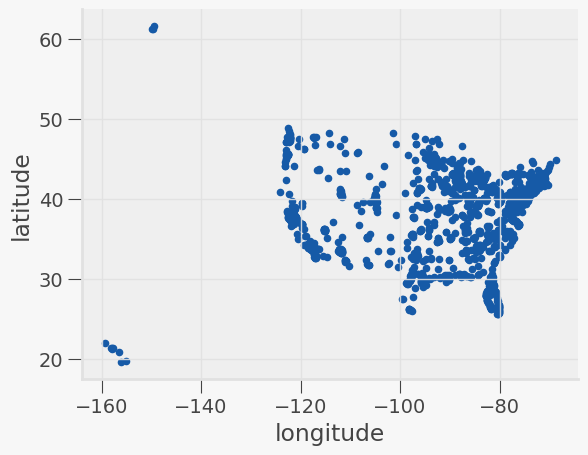

In [18]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [20]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [21]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [22]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

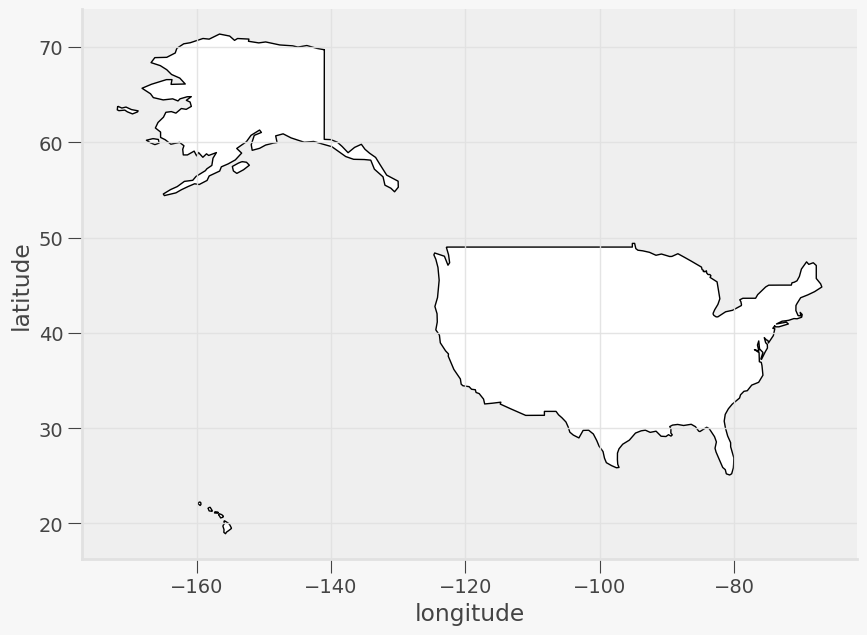

In [24]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

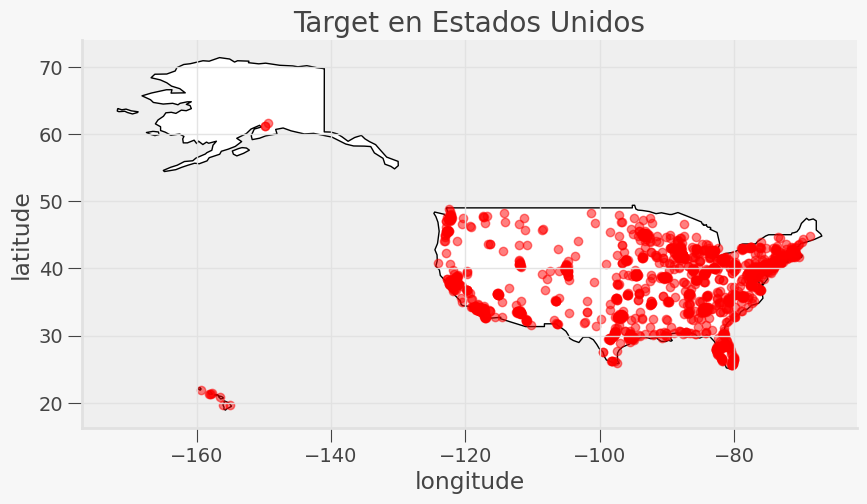

In [25]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.  

Encuentra el numero ideal de almacenes, justifica tu respuesta:  

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?  
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.  
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.  

¿qué librerías nos pueden ayudar a graficar este tipo de datos?  
¿Consideras importante que se grafique en un mapa?, ¿por qué?  
Agrega las conclusiones  


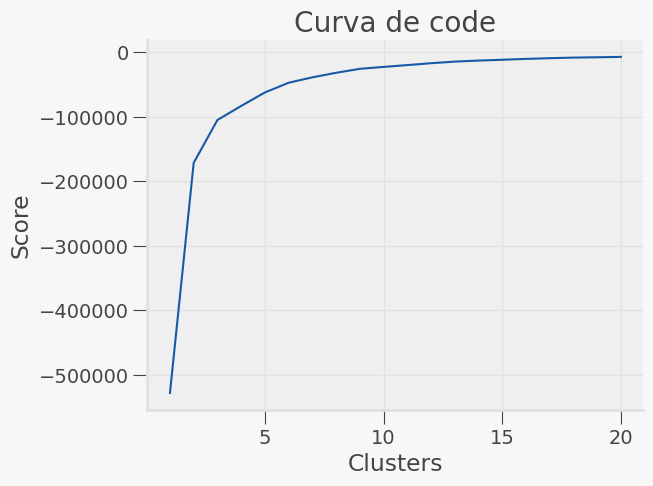

In [49]:
# Para encontrar el numero ideal de almacenes necesitamos medir la reducción varianza vs el numero de clusters, el valor ideal es donde la gráfica de code dobla,
# buscaremos hasta 20 clusters y de ahí decidiremos.
from sklearn.cluster import KMeans

score = {}
for i in range(1,21):
    clusters = KMeans(n_clusters=i, random_state=0)
    score[i] = clusters.fit(latlong).score(latlong)

plt.plot(score.keys(), score.values())
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()


#### Encuentra el numero ideal de almacenes, justifica tu respuesta:  
El número ideal de almacenes es 3. Usando 3 clusters es donde dobla la gráfica de codo y es lo que generalmente se considera el mejor número de clusters.

### Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?

In [135]:
# Vamos a encontrar las coordenadas de los 3 centros de distribución
bestClustering = KMeans(n_clusters = 3, random_state=0)
bestClustering.fit(latlong)
centroids = bestClustering.cluster_centers_
centroids
distCenter0 = (centroids[0][0],centroids[0][1])
distCenter1 = (centroids[1][0],centroids[1][1])
distCenter2 = (centroids[2][0],centroids[2][1])

In [58]:
# Ahora vamos a agregar una columna nueva al df original, esta columna será el número de cluster del que forma parte la tienda
y_hat = bestClustering.predict(latlong)
df['Cluster'] = y_hat

In [141]:
#ahora vamos a buscar la ciudad dentro del cluster más cercana a los centroides que nos dio kmeans
from geopy import distance

cluster0 = df[df.Cluster==0].copy()
cluster1 = df[df.Cluster==1].copy()
cluster2 = df[df.Cluster==2].copy()

cluster0['DistCentroid'] = df.apply(lambda x: distance.geodesic((x['latitude'],x['longitude']),distCenter0).km, axis=1)
cluster1['DistCentroid'] = df.apply(lambda x: distance.geodesic((x['latitude'],x['longitude']),distCenter1).km, axis=1)
cluster2['DistCentroid'] = df.apply(lambda x: distance.geodesic((x['latitude'],x['longitude']),distCenter2).km, axis=1)




In [142]:
print("El Centro de distribución 0 estaría en:")
cluster0[cluster0.DistCentroid == cluster0['DistCentroid'].min()]


El Centro de distribución 0 estaría en:


,name,latitude,longitude,address,phone,website,Coordinates,Cluster,DistCentroid
998,Osage Beach,38.161075,-92.602959,"919 Highway D, Osage Beach, MO 65065-3169",573-302-7969,https://www.target.com/sl/osage-beach/1914,POINT (-92.60296 38.16107),0,65.464327


In [143]:
print("El Centro de distribución 1 estaría en:")
cluster1[cluster1.DistCentroid == cluster1['DistCentroid'].min()]


El Centro de distribución 1 estaría en:


,name,latitude,longitude,address,phone,website,Coordinates,Cluster,DistCentroid
1689,Charlottesville,38.128957,-78.440764,"312 Connor Dr, Charlottesville, VA 22911-5605",434-964-0231,https://www.target.com/sl/charlottesville/1858,POINT (-78.44076 38.12896),1,39.622796


In [144]:
print("El Centro de distribución 2 estaría en:")
cluster2[cluster2.DistCentroid == cluster2['DistCentroid'].min()]


El Centro de distribución 2 estaría en:


,name,latitude,longitude,address,phone,website,Coordinates,Cluster,DistCentroid
213,Clovis NW,36.840307,-119.728331,"695 W Herndon Ave, Clovis, CA 93612-0104",559-321-0009,https://www.target.com/sl/clovis/2018,POINT (-119.72833 36.84031),2,121.527349


### ¿a cuantas tiendas va surtir?

In [111]:
print('El Centro de distribución 0 surtiría a ', len(cluster0), " tiendas")
print('El Centro de distribución 1 surtiría a ', len(cluster1), " tiendas")
print('El Centro de distribución 1 surtiría a ', len(cluster2), " tiendas")


El Centro de distribución 0 surtiría a  628  tiendas
El Centro de distribución 1 surtiría a  826  tiendas
El Centro de distribución 1 surtiría a  385  tiendas


#### ¿sabes a que distancia estará?  

In [128]:
# No estoy seguro que es lo que pregunta, si la distancia promedio entre centros y tiendas o si la distancia entre centros
# La distancia entre centros sería:

print('La distancia del Centro0 al Centro1 es de:')
print(distance.geodesic(distCenter0,distCenter1).km)
print('-----------------------------------------------')
print('La distancia del Centro1 al Centro2 es de:')
print(distance.geodesic(distCenter1,distCenter2).km)
print('-----------------------------------------------')
print('La distancia del Centro0 al Centro2 es de:')
print(distance.geodesic(distCenter0,distCenter2).km)
print('-----------------------------------------------')

La distancia del Centro0 al Centro1 es de:
1296.7554259789883
-----------------------------------------------
La distancia del Centro1 al Centro2 es de:
3508.686207892092
-----------------------------------------------
La distancia del Centro0 al Centro2 es de:
2224.686354428813
-----------------------------------------------


In [147]:
# La distancia promedio de la tiendas a sus respectivos centros de distribución son:
print('La distancia en Km promedio de las tiendas al Centro0 es de:')
print(cluster0['DistCentroid'].mean())
print('-----------------------------------------------------------')
# La distancia promedio de la tiendas a sus respectivos centros de distribución son:
print('La distancia en Km promedio de las tiendas al Centro1 es de:')
print(cluster1['DistCentroid'].mean())
print('-----------------------------------------------------------')
# La distancia promedio de la tiendas a sus respectivos centros de distribución son:
print('La distancia en Km promedio de las tiendas al Centro2 es de:')
print(cluster2['DistCentroid'].mean())
print('-----------------------------------------------------------')

La distancia en Km promedio de las tiendas al Centro0 es de:
696.0376579225714
-----------------------------------------------------------
La distancia en Km promedio de las tiendas al Centro1 es de:
586.7415847810628
-----------------------------------------------------------
La distancia en Km promedio de las tiendas al Centro2 es de:
695.3957837686759
-----------------------------------------------------------


#### ¿qué librerías nos pueden ayudar a graficar este tipo de datos?
Una librería que podria usa para graficar este tipo datos sería GeoPandas
https://geopandas.org/en/stable/ 

#### ¿Consideras importante que se grafique en un mapa?, ¿por qué? 
Considero vital poder graficar en un mapa este tipo de infomación, al graficarlo en un mapa los datos toman contexto y puntos que en un principio parecerían outliers rapidamente queda claro porque están localizados en esa ciudad o lugar geográfico.

#### Agrega las conclusiones  
Kmeans sirve para hacer clusters de datos de una manera muy práctica. Aquí en el ejercicio solamente usamos una métrica, la distancia euclidiana para crear nuestros clusters, me hubiera gustado utilizar más métricas en el análisis, como costo transportación, tamaño de las tienas, rentabilidad etc, para ver como cambiarían los resultados tanto en el número de almacenes como en la localización.